In [1]:
import keras
from keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Data/malicious_phish.csv")

In [5]:
X = df["url"]
y = df["type"]

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X.values,y.values,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((520952,), (130239,), (520952,), (130239,))

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
toknizer = Tokenizer(char_level=True, oov_token='@',num_words=None)
toknizer.fit_on_texts(X_train)
seq = toknizer.texts_to_sequences(X_train)
X_train = pad_sequences(seq,maxlen=77,padding='post')
seq = toknizer.texts_to_sequences(X_test)
X_test = pad_sequences(seq,maxlen=77,padding='post')

In [18]:
original_model = tf.keras.models.load_model('./saved_models/lstm_char_embedding/')

In [24]:
get_last_layer_output = tf.keras.backend.function([original_model.layers[0].input],
                                  [original_model.layers[3].output])

In [68]:
layer_output_test = get_last_layer_output(np.expand_dims(X_test,axis=-1))[0]
layer_output_train = get_last_layer_output(np.expand_dims(X_train,axis=-1))[0]

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
output_train = pca.fit_transform(layer_output_train)
output_test = pca.transform(layer_output_test)

In [93]:
import matplotlib.pyplot as plt
labels = pd.Series(y_test)
def plot_clusters(output,colors):
    fig = plt.figure(figsize=(15,15))
    plt.scatter(output[:,0], output[:,1],c=colors)
    plt.show()

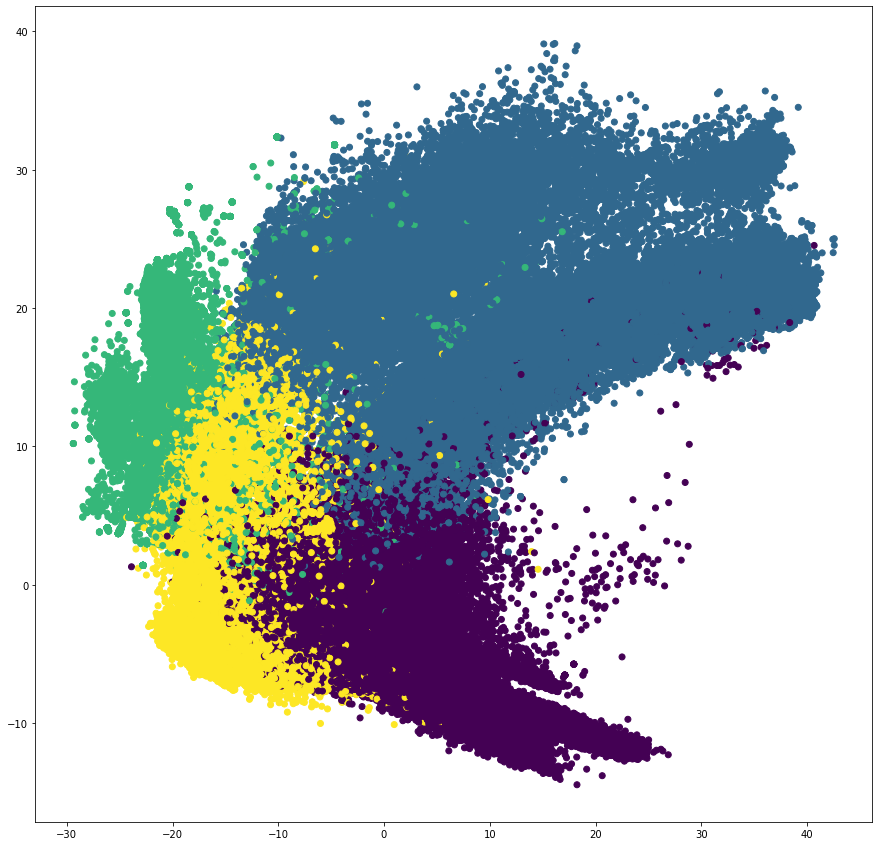

In [94]:
plot_clusters(output_train,pd.Categorical(y_train).codes)

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(output_train,y_train)
y_pred = neigh.predict(output_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      benign       0.97      0.98      0.97     85778
  defacement       0.96      0.97      0.97     19104
     malware       0.92      0.89      0.91      6521
    phishing       0.88      0.83      0.85     18836

    accuracy                           0.95    130239
   macro avg       0.93      0.92      0.92    130239
weighted avg       0.95      0.95      0.95    130239



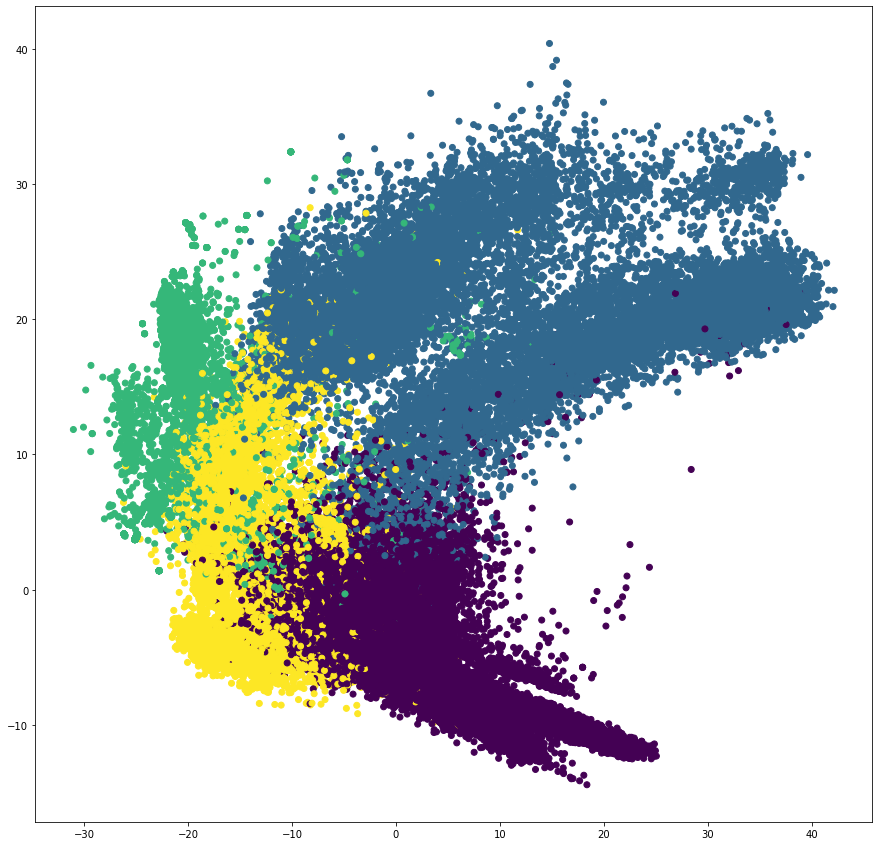

In [107]:
plot_clusters(output_test,pd.Categorical(y_test).codes)